<a href="https://colab.research.google.com/github/Esandu-Meth-Obadaarachchi/HCHO-level-Time-series-forecasting/blob/main/kandy_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings

import matplotlib as mpl
import numpy as np
import pandas as pd  # Basic library for all of our dataset operations
import statsmodels as sm
import tensorflow as tf
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


In [ ]:
# Extra settings
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
plt.style.use('bmh')
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'
print(tf.__version__)

In [2]:
from google.colab import drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
kandy_full_csv_path = '/content/drive/MyDrive/data engineering CW/kandy_df_full.csv'

In [5]:
kandy_df = pd.read_csv(kandy_full_csv_path, header=0, index_col=0)

In [6]:
kandy_df.set_index('Current Date', inplace=True)

In [7]:
kandy_df.head()

,Location,Next Date,HCHO reading,Specific Humidity,Relative Humidity,Precipitation,Temperature,Skin Temperature
Current Date,,,,,,,,
2019-01-01,Kandy Proper,2019-01-02,0.000176,14.47,87.81,0.09,21.72,21.86
2019-01-02,Kandy Proper,2019-01-03,0.000092,13.98,87.06,0.01,21.18,21.30
2019-01-03,Kandy Proper,2019-01-04,0.000092,13.55,86.38,0.02,20.96,20.98
2019-01-04,Kandy Proper,2019-01-05,0.000191,13.31,86.06,0.00,20.68,20.59
2019-01-05,Kandy Proper,2019-01-06,0.000122,15.44,88.88,0.04,22.26,22.37


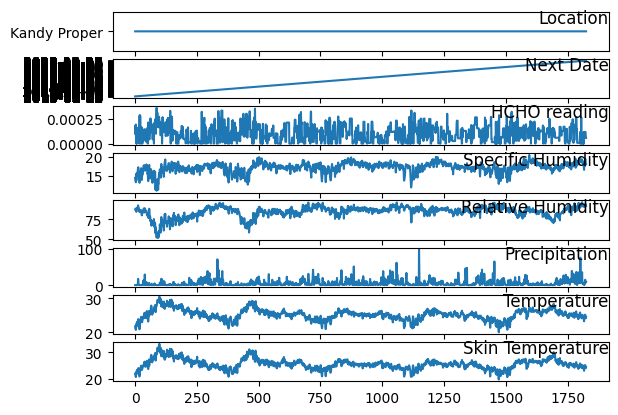

In [8]:
values = kandy_df.values
groups = [0, 1, 2, 3, 4, 5, 6, 7]
i = 1
# plot each column
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(kandy_df.columns[group], y=0.5, loc='right')
    i += 1


plt.show()

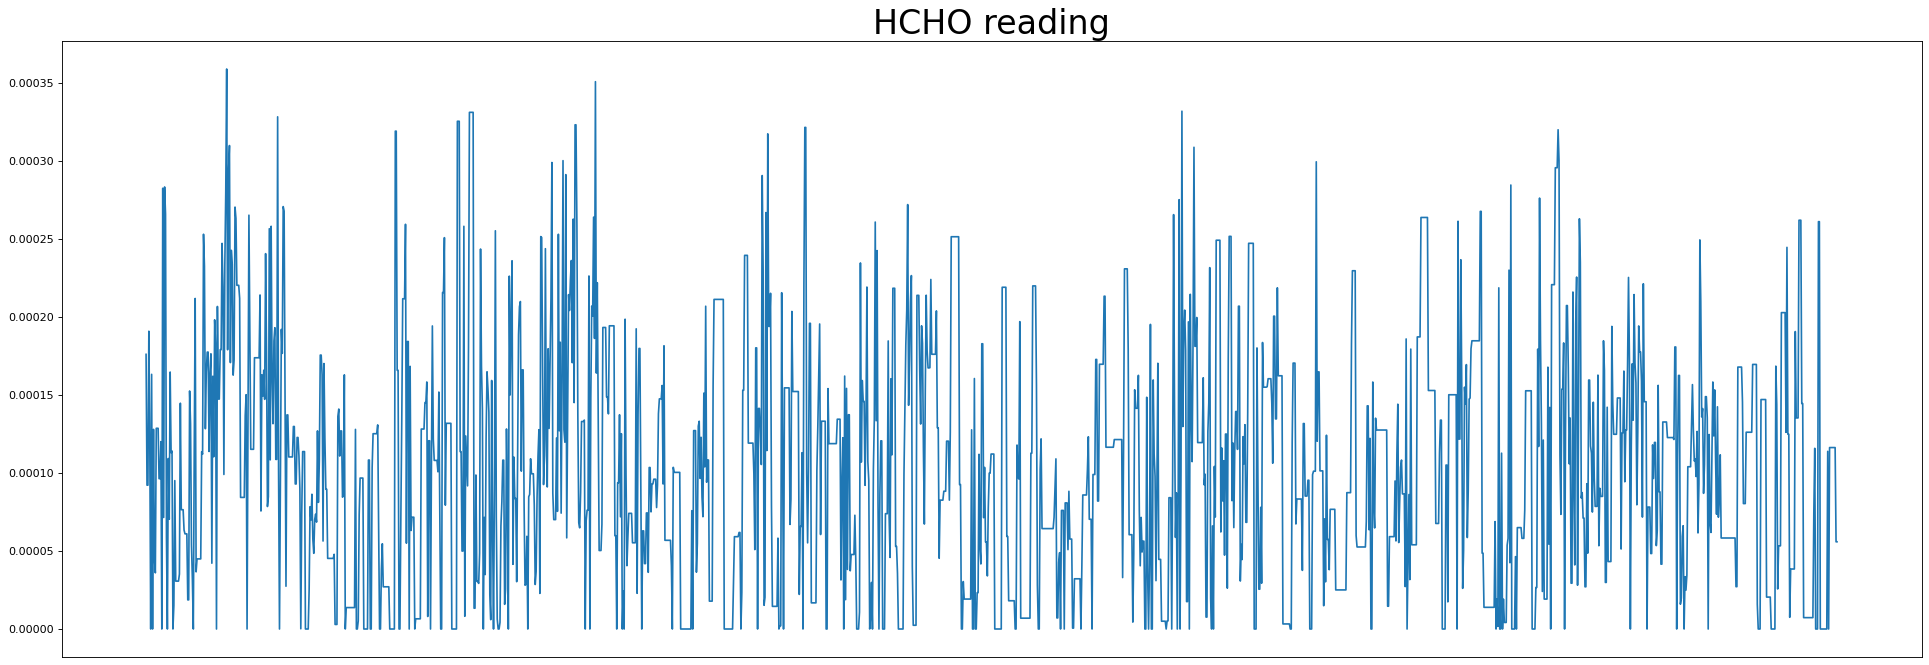

In [9]:
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('HCHO reading', fontsize=30)
plt.plot(kandy_df['HCHO reading'])
plt.xticks([])  # Remove x-axis ticks
plt.show()

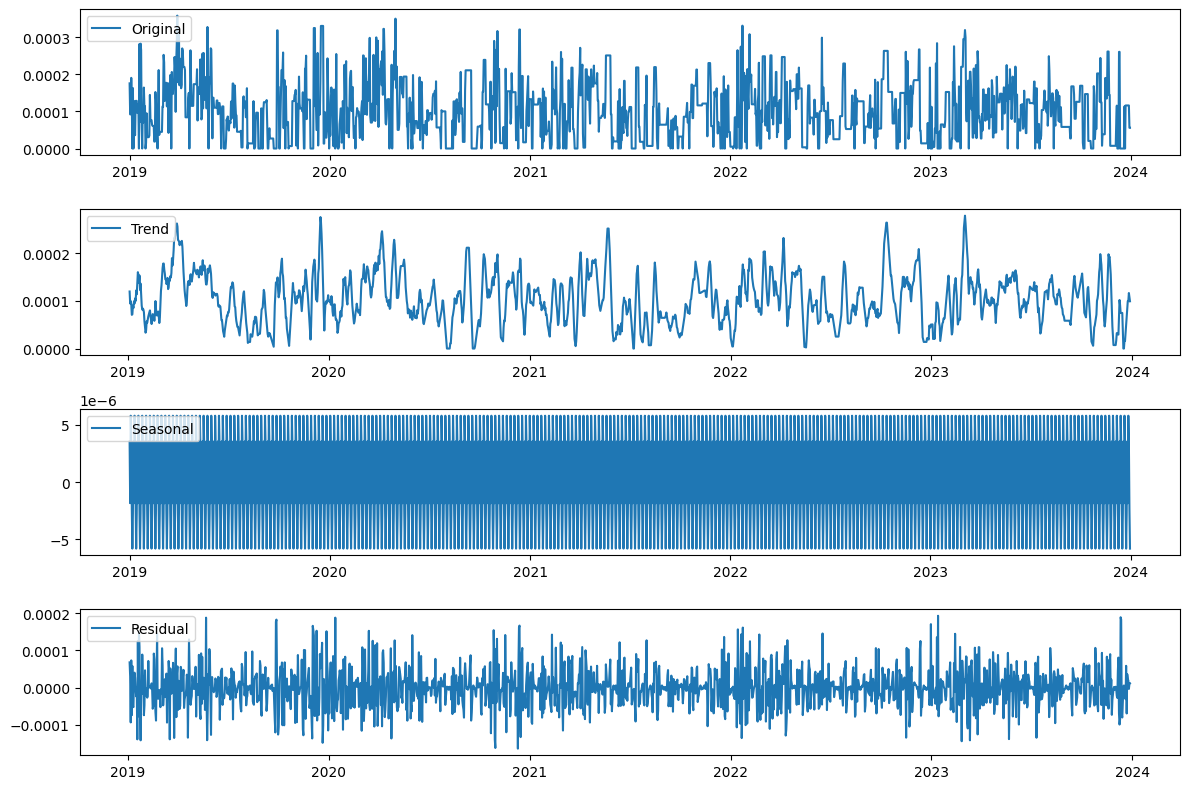

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming colombo_df has a 'Date' column as the index and 'HCHO reading' as the time series data

# Convert index to DatetimeIndex
kandy_df.index = pd.to_datetime(kandy_df.index)

# Perform seasonal decomposition
result = seasonal_decompose(kandy_df['HCHO reading'], model='additive')

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

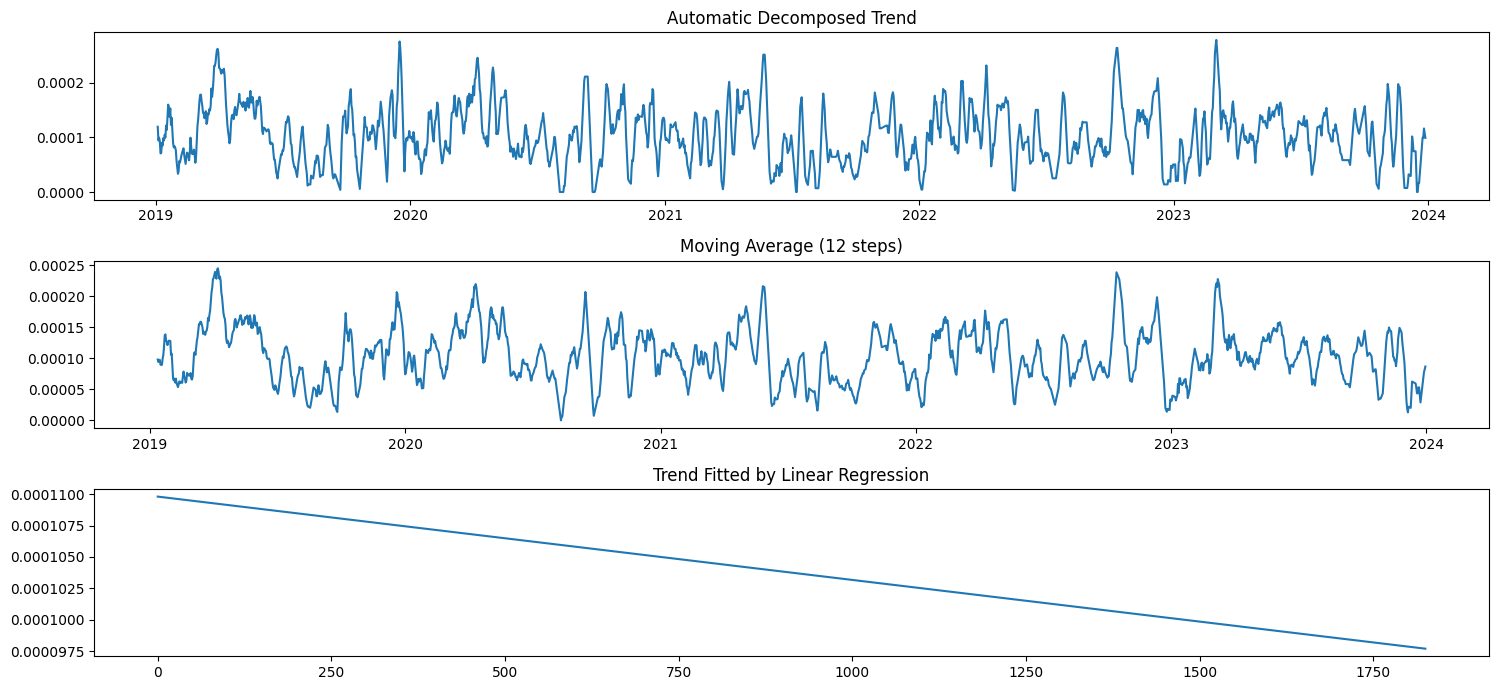

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming colombo_df is your DataFrame containing the 'HCHO reading' data

# Automatic decomposition
result = seasonal_decompose(kandy_df['HCHO reading'], model='additive')

# Moving average
moving_avg = kandy_df['HCHO reading'].rolling(12).mean()

# Fit a linear regression model
X = np.arange(len(kandy_df)).reshape(-1, 1)
y = kandy_df['HCHO reading'].values
model = LinearRegression()
model.fit(X, y)
trend_lr = model.predict(X)

# Plotting
fig = plt.figure(figsize=(15, 7))
layout = (3, 1)
pm_ax = plt.subplot2grid(layout, (0, 0))
mv_ax = plt.subplot2grid(layout, (1, 0))
fit_ax = plt.subplot2grid(layout, (2, 0))

pm_ax.plot(result.trend, label="Automatic decomposed trend")
pm_ax.set_title("Automatic Decomposed Trend")

mv_ax.plot(moving_avg, label="Moving average (12 steps)")
mv_ax.set_title("Moving Average (12 steps)")

fit_ax.plot(trend_lr, label="Trend fitted by linear regression")
fit_ax.set_title("Trend Fitted by Linear Regression")

plt.tight_layout()
plt.show()

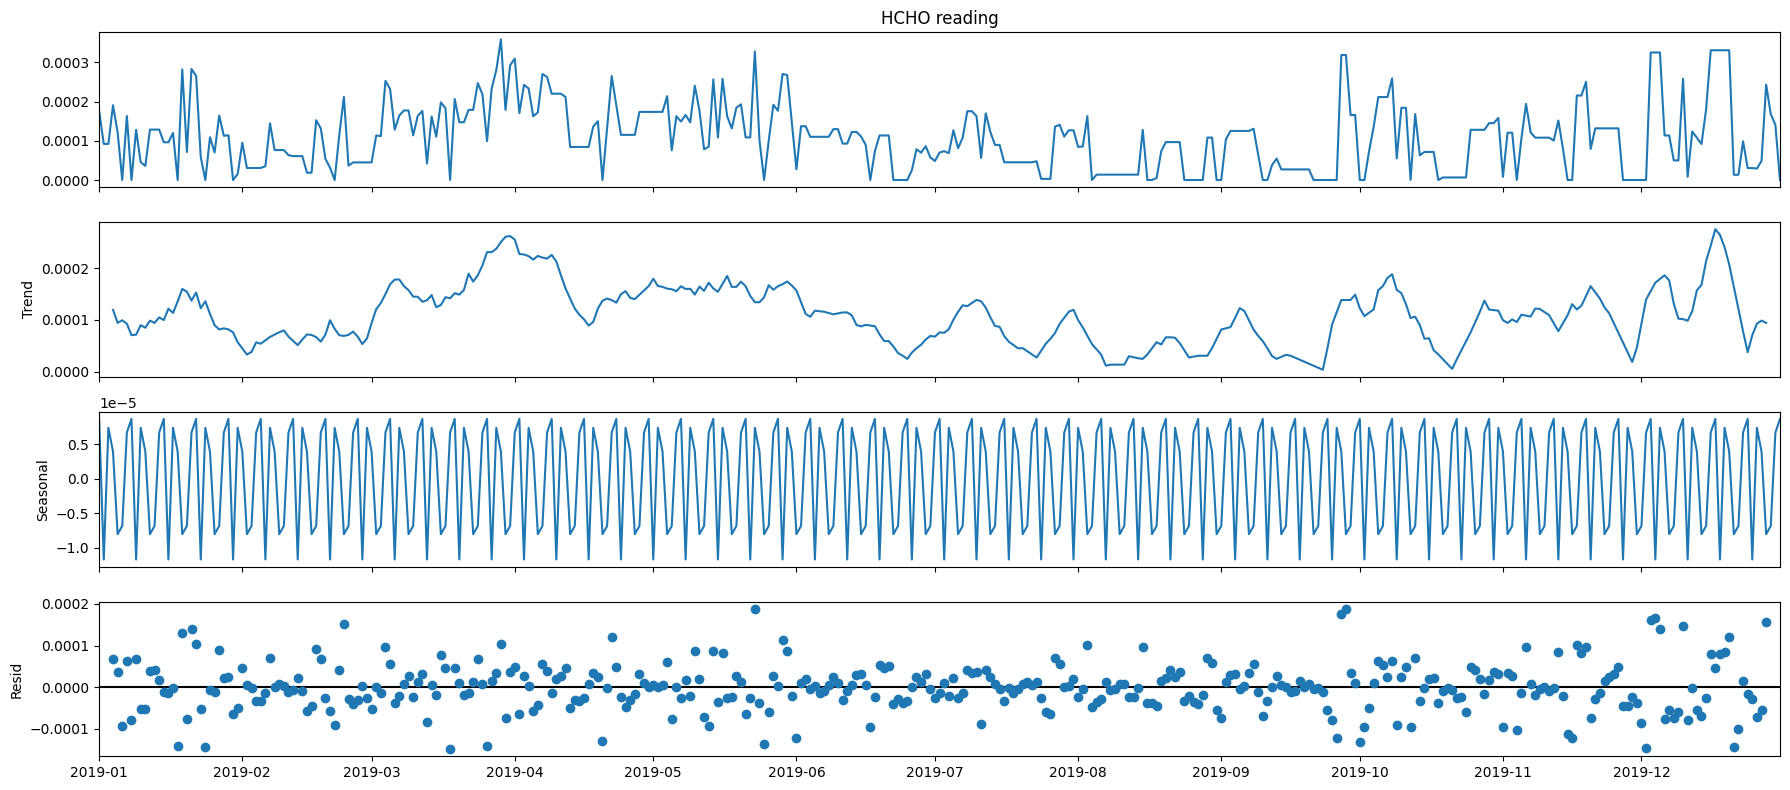

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd

# Set figure size
plt.rcParams['figure.figsize'] = (18, 8)

# Extracting the first year of data
series = kandy_df['HCHO reading'][:365]

# Perform seasonal decomposition
result = seasonal_decompose(series, model='additive')

# Plot the decomposed components
result.plot()

# Show the plot
plt.show()

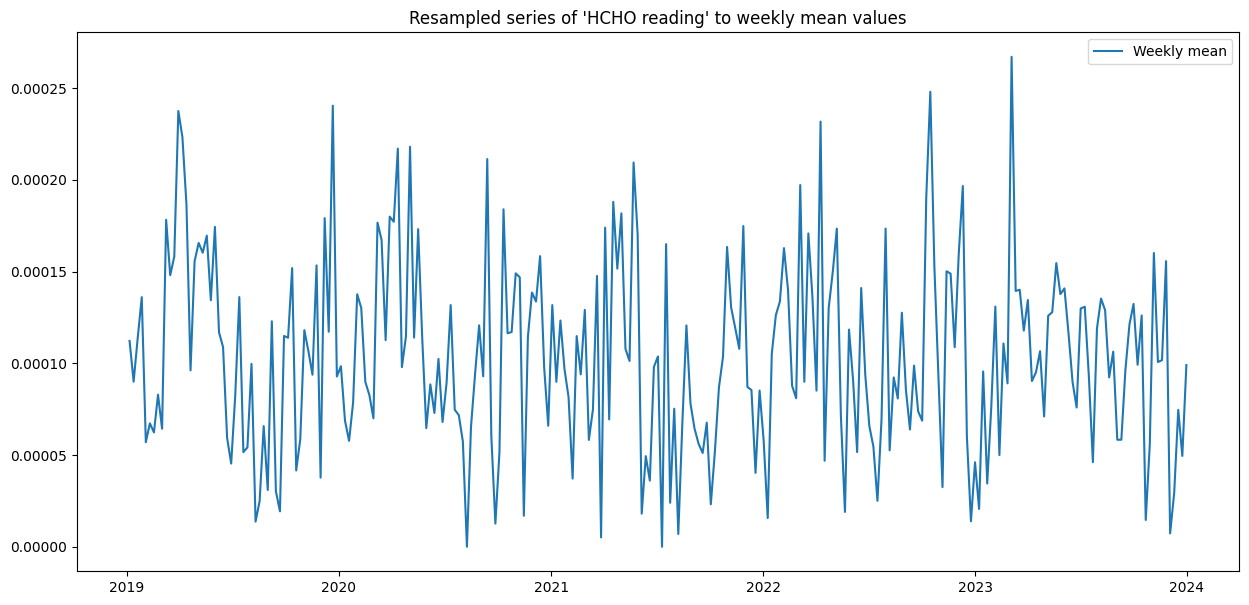

In [14]:
# Convert 'HCHO reading' column to numeric, coerce errors to NaN
kandy_df['HCHO reading'] = pd.to_numeric(kandy_df['HCHO reading'], errors='coerce')

# Resample your DataFrame to weekly mean values for the 'HCHO reading' column only
weekly_mean = kandy_df['HCHO reading'].resample('W').mean()

# Plot the weekly mean values
plt.figure(figsize=(15, 7))
plt.plot(weekly_mean, label='Weekly mean')
plt.title("Resampled series of 'HCHO reading' to weekly mean values")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-15-19109c193d73>:10: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(X, y, degree)


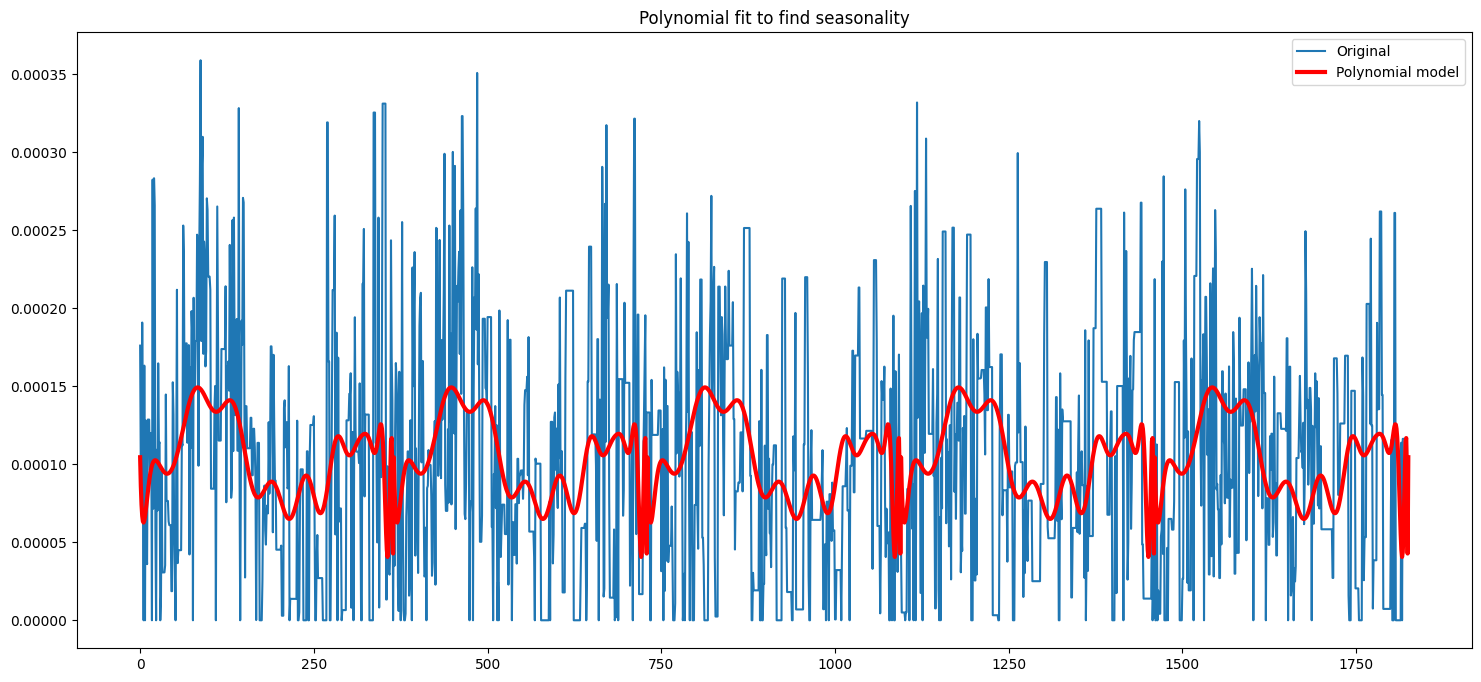

In [15]:

# Extracting the 'HCHO reading' column
series = kandy_df['HCHO reading'].values

# Define X values as days of the year (mod 365)
X = [i % 365 for i in range(0, len(series))]
y = series
degree = 100

# Fit polynomial
coef = np.polyfit(X, y, degree)

# Create curve
curve = np.polyval(coef, X)

# Plot curve over original data
plt.plot(series, label='Original')
plt.plot(curve, color='red', linewidth=3, label='Polynomial model')
plt.legend()
plt.title("Polynomial fit to find seasonality")
plt.show()

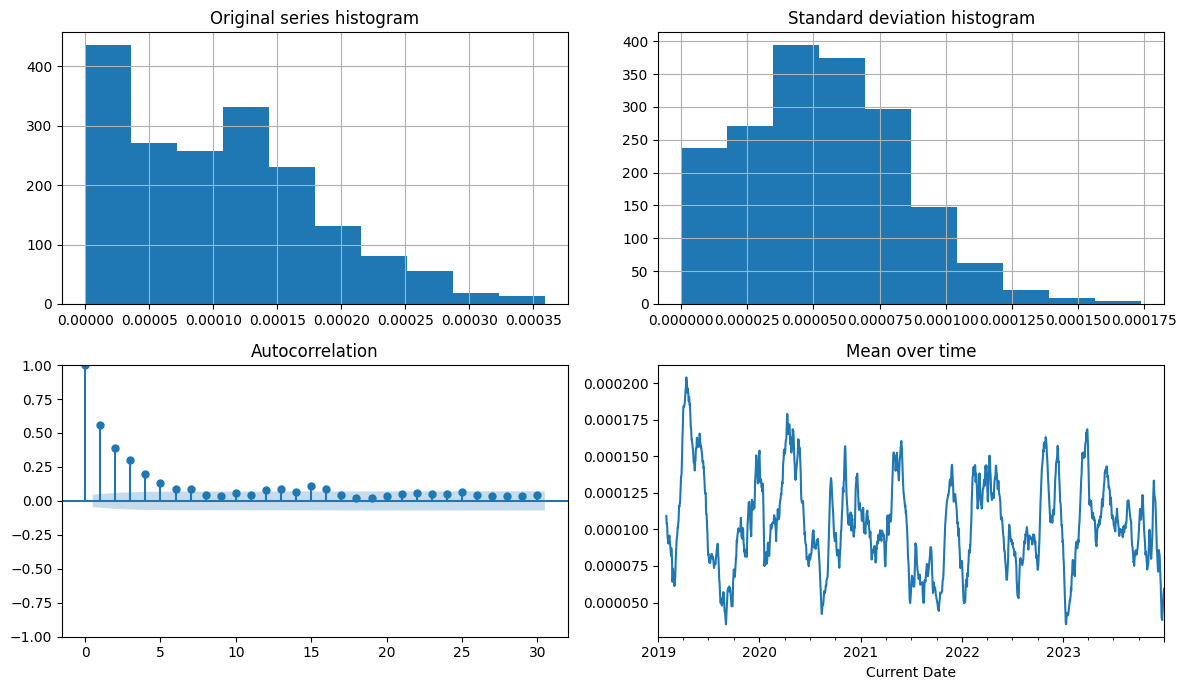

In [16]:
from statsmodels.graphics.tsaplots import plot_acf

# Set up figure and subplots
fig = plt.figure(figsize=(12, 7))
layout = (2, 2)
hist_ax = plt.subplot2grid(layout, (0, 0))
ac_ax = plt.subplot2grid(layout, (1, 0))
hist_std_ax = plt.subplot2grid(layout, (0, 1))
mean_ax = plt.subplot2grid(layout, (1, 1))

# Plot histogram of the original series
kandy_df['HCHO reading'].hist(ax=hist_ax)
hist_ax.set_title("Original series histogram")

# Plot autocorrelation
plot_acf(kandy_df['HCHO reading'], lags=30, ax=ac_ax)
ac_ax.set_title("Autocorrelation")

# Calculate rolling standard deviation
rolling_std = kandy_df['HCHO reading'].rolling(7).std()

# Plot histogram of the rolling standard deviation
rolling_std.hist(ax=hist_std_ax)
hist_std_ax.set_title("Standard deviation histogram")

# Calculate rolling mean
rolling_mean = kandy_df['HCHO reading'].rolling(30).mean()

# Plot rolling mean
rolling_mean.plot(ax=mean_ax)
mean_ax.set_title("Mean over time")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

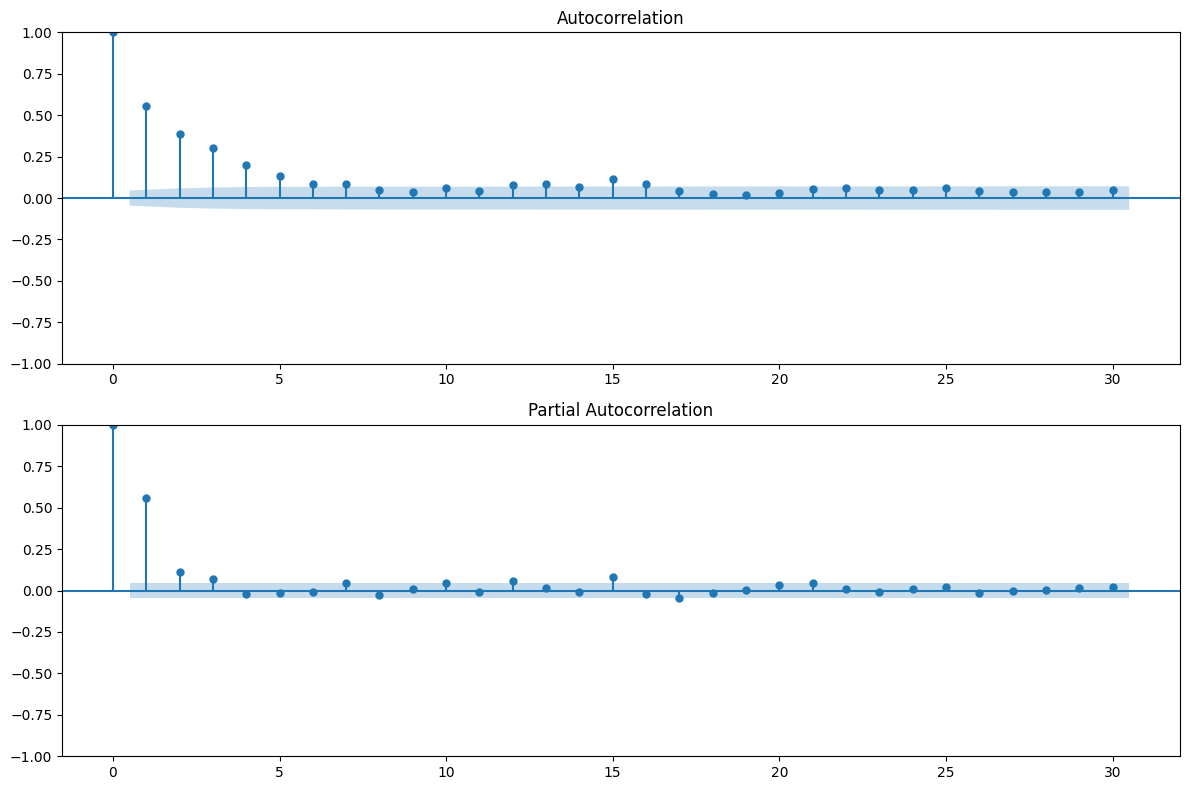

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Set up figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot autocorrelation
plot_acf(kandy_df['HCHO reading'], lags=30, ax=ax1)
ax1.set_title("Autocorrelation")

# Plot partial autocorrelation
plot_pacf(kandy_df['HCHO reading'], lags=30, ax=ax2)
ax2.set_title("Partial Autocorrelation")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Determine rolling statistics
rolmean = kandy_df['HCHO reading'].rolling(window=12).mean()
rolstd = kandy_df['HCHO reading'].rolling(window=12).std()

# Plot rolling statistics
plt.figure(figsize=(17, 8))
plt.plot(kandy_df['HCHO reading'], label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.show()

In [19]:
from statsmodels.tsa.stattools import adfuller

# Extract 'HCHO reading' data
X = kandy_df['HCHO reading'].values

# Perform Augmented Dickey-Fuller test
result = adfuller(X)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.353855147136908
p-value: 2.945070081231198e-13
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


# **Splitting the dataset**

In [20]:
# Set the split date
split_date = '2023-01-01'

# Split the DataFrame into training and testing sets
kandy_training = kandy_df.loc[kandy_df.index <= split_date]
kandy_test = kandy_df.loc[kandy_df.index > split_date]

# Print the lengths of the training and testing sets
print(f"{len(kandy_training)} days of training data \n {len(kandy_test)} days of testing data ")

# Save the training and testing sets to CSV files
kandy_training.to_csv('/content/drive/MyDrive/data engineering CW/kandy_training.csv')
kandy_test.to_csv('/content/drive/MyDrive/data engineering CW/kandy_test.csv')


1462 days of training data 
 364 days of testing data 


# ***AR MODEL***

In [21]:
from tqdm import tqdm  # Import tqdm for progress bar
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Initialize dictionaries to store results and predictions
resultsDict = {}
predictionsDict = {}

# Walk through the test data, training and predicting 1 day ahead for all the test data
index = len(kandy_training)
yhat = []

for t in tqdm(range(len(kandy_test['HCHO reading']))):
    temp_train = kandy_df['HCHO reading'][:len(kandy_training)+t]
    model = AutoReg(temp_train, lags=1)  # You can adjust the number of lags as needed
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train))
    yhat.append(predictions[0])

yhat = pd.Series(yhat, index=kandy_test.index)
resultsDict['AR'] = mean_squared_error(kandy_test['HCHO reading'], yhat)
predictionsDict['AR'] = yhat

  0%|          | 0/364 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support e

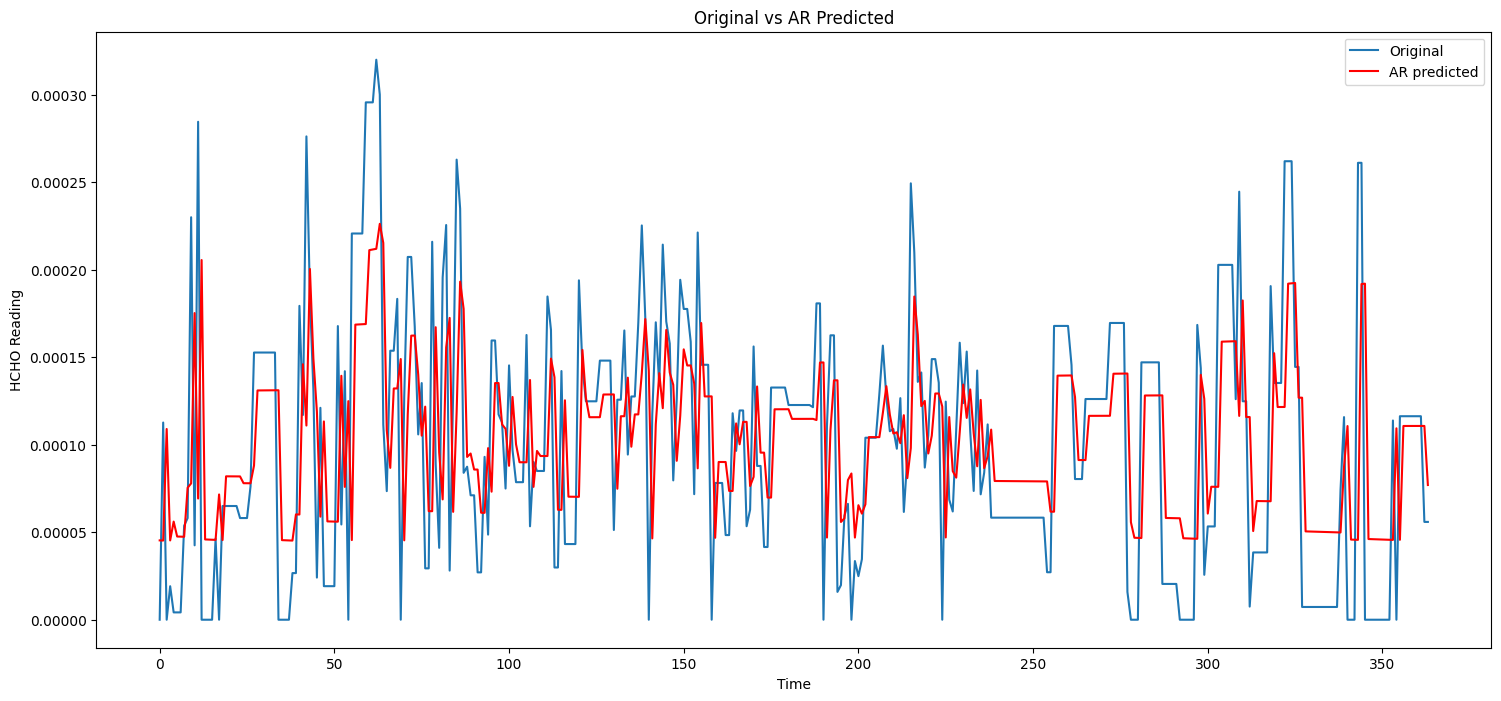

In [22]:
# Plot the results
plt.plot(kandy_test['HCHO reading'].values, label='Original')
plt.plot(yhat.values, color='red', label='AR predicted')
plt.legend()
plt.title('Original vs AR Predicted')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.show()

# ***MA MODEL***

In [23]:
from statsmodels.tsa.arima.model import ARIMA

# Walk through the test data, training and predicting 1 day ahead for all the test data
index = len(kandy_training)
yhat = []

for t in tqdm(range(len(kandy_test['HCHO reading']))):
    temp_train = kandy_df['HCHO reading'][:len(kandy_training)+t]
    model = ARIMA(temp_train, order=(0, 0, 1))  # MA model with order (0, 0, 1)
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=1)
    yhat.append(predictions[0])

# Convert predictions to a pandas Series
yhat = pd.Series(yhat, index=kandy_test.index)

# Calculate and store the evaluation metrics
resultsDict['MA'] = mean_squared_error(kandy_test['HCHO reading'], yhat)
predictionsDict['MA'] = yhat

  0%|          | 0/364 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
  0%|          | 1/364 [00:02<16:28,  2.72s/it]/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWa

KeyboardInterrupt: 

In [ ]:
# Plot the original data and the predicted values of Moving Average
plt.plot(kandy_test['HCHO reading'].values, label='Original')
plt.plot(yhat.values, color='red', label='MA predicted')
plt.legend()
plt.title('Original vs MA Predicted')
plt.xlabel('Time')
plt.ylabel('HCHO reading')
plt.show()